# Exercise for Graph IV 🛹
Your task:
Make the graph! You will need to make use of 2 conditional edges!

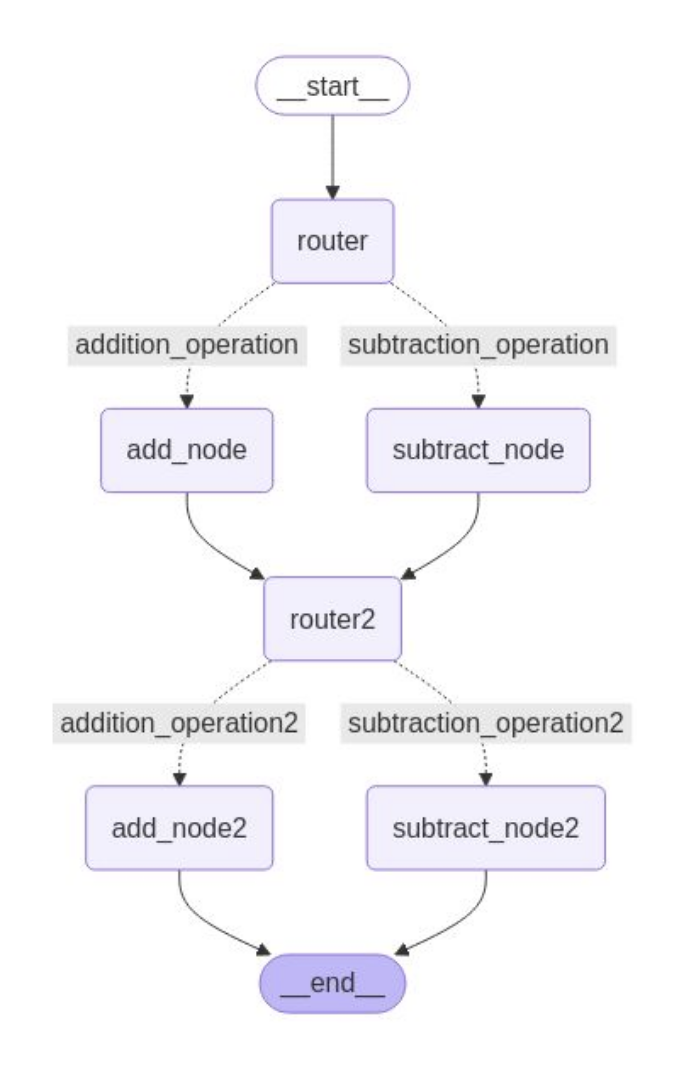

```
Input:
initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+",
finalNumber= 0, finalNumber2 = 0)
```


In [2]:
from typing import List, TypedDict

from langgraph.graph import END, START, StateGraph

In [4]:
class AgentState(TypedDict):  # Our state schema
    number1: int
    operation: str
    number2: int

    number3: int
    operation2: str
    number4: int

    finalNumber: int
    finalNumber2: int

In [5]:
def adder(state: AgentState) -> AgentState:
    """adds two numbers from first set"""

    state["finalNumber"] = state["number1"] + state["number2"]
    return state

In [6]:
def subtracter(state: AgentState) -> AgentState:
    """subtracts two numbers from first set"""

    state["finalNumber"] = state["number1"] - state["number2"]
    return state

In [7]:
def adder2(state: AgentState) -> AgentState:
    """adds two numbers from second set"""

    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

In [8]:
def subtracter2(state: AgentState) -> AgentState:
    """subtracts two numbers from second set"""

    state["finalNumber"] = state["number3"] - state["number4"]
    return state

In [9]:
def decider_for_first_set(state: AgentState) -> AgentState:
    """decides where to go for first operator"""
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"


def decider_for_second_set(state: AgentState) -> AgentState:
    """decides where to go for second operator"""
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [10]:
graph = StateGraph(AgentState)

In [11]:
graph.add_node("subtracter", subtracter)
graph.add_node("subtracter2", subtracter2)
graph.add_node("adder", adder)
graph.add_node("adder2", adder2)
graph.add_node("router", lambda state: state)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decider_for_first_set,
    {"addition_operation": "adder", "subtraction_operation": "subtracter"},
)
graph.add_edge("adder", "router2")
graph.add_edge("subtracter", "router2")
graph.add_conditional_edges(
    "router2",
    decider_for_second_set,
    {"addition_operation2": "adder2", "subtraction_operation2": "subtracter2"},
)
graph.add_edge("adder2", END)
graph.add_edge("subtracter2", END)

app = graph.compile()

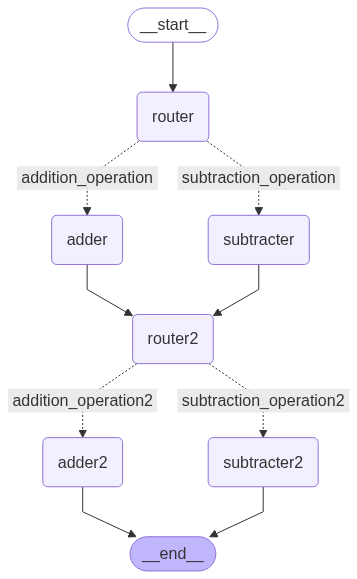

In [12]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
initial_state = AgentState(
    number1=10,
    operation="-",
    number2=5,
    number3=7,
    number4=2,
    operation2="+",
    finalNumber=0,
    finalNumber2=0,
)

In [14]:
app.invoke(initial_state)

{'number1': 10,
 'operation': '-',
 'number2': 5,
 'number3': 7,
 'operation2': '+',
 'number4': 2,
 'finalNumber': 5,
 'finalNumber2': 9}